<a href="https://colab.research.google.com/github/ShikharXGupta/Exploring-CIFAR-10-w-MLP-CNN/blob/main/Exploring_CIFAR_10_w_MLP_%7C_CNN_%7C_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them. In this notebook, we attempt to use Multi-Layer Perceptron (MLP), Convolutional Neural Network (CNN) and Transfer Learning (ResNet50 - TensorFlow) to build a model than can recognise the image of the test set after being trained on training set from CIFAR-10.

Features:

Number of Instances: 60,000 (50,000 for training, 10,000 for testing)
Image Size: 32x32 pixels, color images (3 color channels)
Number of Classes: 10


Accessibility:

The CIFAR-10 dataset is widely used for machine learning and computer vision research and can be easily accessed through libraries like TensorFlow and PyTorch.

***LOAD AND EXPLORATION***

---



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Exploring the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [ ]:
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


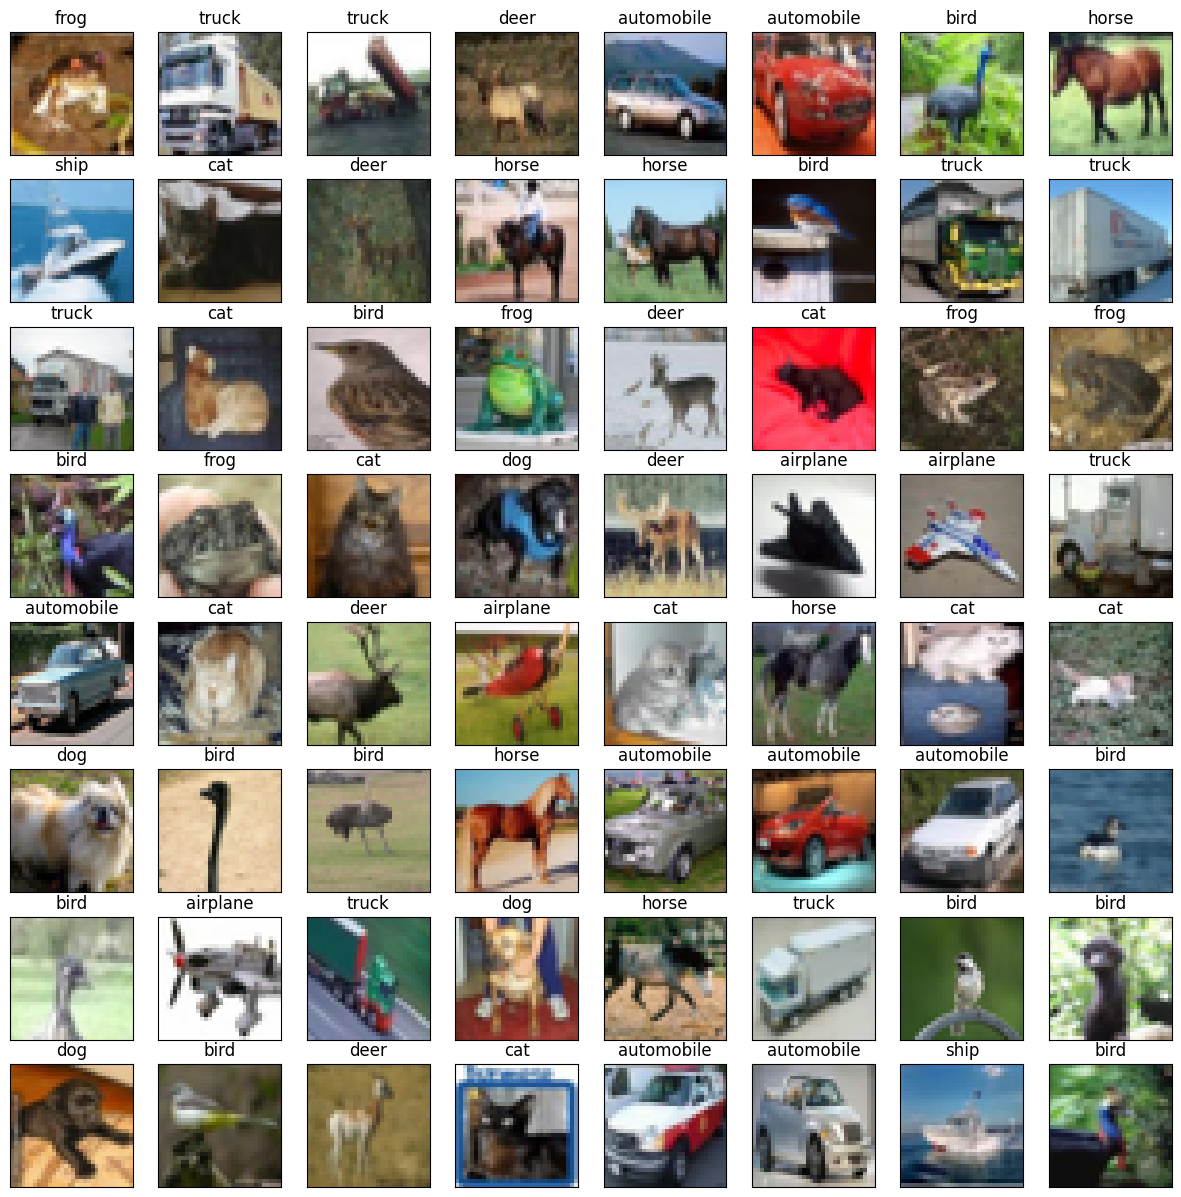

In [ ]:
# Exploring the CIFAR-10 dataset with and overview

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

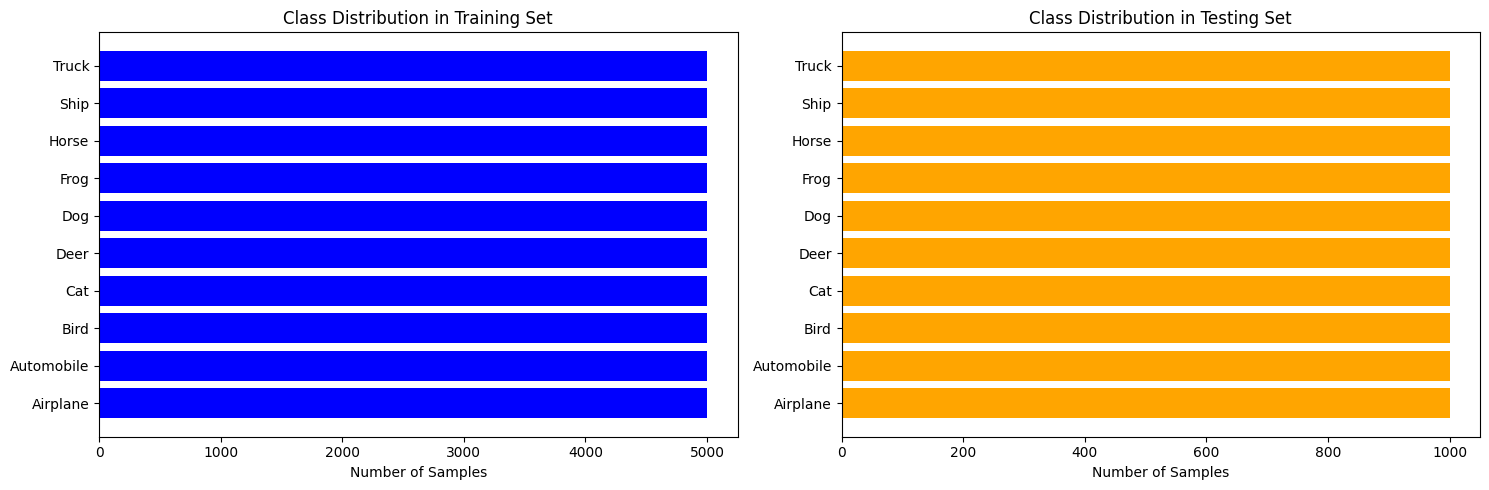

In [ ]:
# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get class distribution for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# Set figure size and create subplots
plt.figure(figsize=(15, 5))

# Plot class distribution for training set
plt.subplot(1, 2, 1)
plt.barh(classes_name, train_counts, color='blue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Training Set')

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.barh(classes_name, test_counts, color='orange')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Testing Set')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## **DATA NORMALIZATION**

In [ ]:
# Method 1: Normalization to [0,1] using Min-Max Scaling
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

In [ ]:
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

In [ ]:
# Method 2: Normalization to [-1,1] following a Normal Distribution
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

In [ ]:
x_test_standardized = (x_test - x_train_mean) / x_train_std

# **IMPLEMENTING A MULTI-LAYER PERCEPTRON FOR CIFAR-10 CLASSIFICATION**

Objective: Build and train a Multi-Layer Perceptron (MLP) to classify images from the CIFAR-10 dataset, and achieve >50% accuracy.

Dataset Preparation

In [ ]:
# Flatten the images
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

# Display the shape of flattened images
print("Flattened Training Images Shape:", x_train_flat.shape)
print("Flattened Testing Images Shape:", x_test_flat.shape)

Flattened Training Images Shape: (50000, 3072)
Flattened Testing Images Shape: (10000, 3072)


# **Model Architecture**

In [ ]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model")

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  # 3072 = 32x32x3
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# **Training**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
352/352 [==============================] - 14s 37ms/step - loss: 2.0111 - accuracy: 0.3079 - val_loss: 1.8058 - val_accuracy: 0.3610
Epoch 2/10
352/352 [==============================] - 12s 35ms/step - loss: 1.7514 - accuracy: 0.3818 - val_loss: 1.7033 - val_accuracy: 0.4012
Epoch 3/10
352/352 [==============================] - 13s 36ms/step - loss: 1.6702 - accuracy: 0.4071 - val_loss: 1.6489 - val_accuracy: 0.4154
Epoch 4/10
352/352 [==============================] - 12s 35ms/step - loss: 1.6150 - accuracy: 0.4320 - val_loss: 1.6351 - val_accuracy: 0.4232
Epoch 5/10
352/352 [==============================] - 12s 35ms/step - loss: 1.5780 - accuracy: 0.4459 - val_loss: 1.6118 - val_accuracy: 0.4298
Epoch 6/10
352/352 [==============================] - 13s 37ms/step - loss: 1.5491 - accuracy: 0.4561 - val_loss: 1.5949 - val_accuracy: 0.4388
Epoch 7/10
352/352 [==============================] - 13s 36ms/step - loss: 1.5222 - accuracy: 0.4638 - val_loss: 1.5635 - val_accuracy:

# **Evaluation**

In [ ]:
The model's performance on the CIFAR-10 test set is as follows:

Test Loss: 1.50
Test Accuracy: 0.4587 (45.87%)

Possible next steps to improve:

Model Complexity: Experiment with increasing the model's complexity by adding more layers, neurons, or using different architectures such as convolutional neural networks (CNNs). CNNs are particularly effective for image classification tasks like CIFAR-10 as they can capture spatial patterns more effectively.

Hyperparameter Tuning: Experiment with different hyperparameters such as learning rate, batch size, number of epochs, and optimizer settings to find the optimal configuration for your model.

Data Augmentation: Augment the training data with techniques like rotation, scaling, flipping, or adding noise to increase the diversity of training samples and improve the model's robustness.

Hyperparameter Tuning¶

Hyperparameter Tuning: Besides learning rate, batch size, and number of epochs, number and size of layers of MLP are also hyperparameters that can be tuned. Adding more layers and/or increasing the number of neurons per layer can enable the modeling of more complex functions, but this also increases the risk of overfitting and computational costs. It's advisable to start with simpler models and gradually increase complexity. Try the following architectures using ReLU as the activation function for hidden layers and softmax as the activation function for the output layer:

(1) MLP with one hidden layer consisting of 128 neurons.

(2) MLP with one hidden layer consisting of 256 neurons.

(3) MLP with two hidden layers consisting of 256 and 128 neurons, respectively.

In [ ]:
# Define the MLP model architectures
def create_mlp_model_1():
    model = tf.keras.models.Sequential([

        # Hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3

        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_2():
    model = tf.keras.models.Sequential([

        # Hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3

        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_3():
    model = tf.keras.models.Sequential([

        # First hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3

        # Second hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),

        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Compile and train the model
def compile_and_train_model(model):
    # Compile the model
    optimizer = Adam()  # Use Adam optimizer
    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # Train the model on the CIFAR-10 training set
    history = model.fit(x_train_flat, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.1)  # Use 10% of training data as validation

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

In [ ]:
# Create and train models
print("MLP Model with one hidden layer (128 neurons):")
mlp_model_1 = create_mlp_model_1()
compile_and_train_model(mlp_model_1)

print("\nMLP Model with one hidden layer (256 neurons):")
mlp_model_2 = create_mlp_model_2()
compile_and_train_model(mlp_model_2)

print("\nMLP Model with two hidden layers (256 and 128 neurons):")
mlp_model_3 = create_mlp_model_3()
compile_and_train_model(mlp_model_3)

MLP Model with one hidden layer (128 neurons):
Epoch 1/10
352/352 [==============================] - 6s 15ms/step - loss: 1.9898 - accuracy: 0.2885 - val_loss: 1.8652 - val_accuracy: 0.3308
Epoch 2/10
352/352 [==============================] - 4s 11ms/step - loss: 1.8262 - accuracy: 0.3552 - val_loss: 1.8130 - val_accuracy: 0.3700
Epoch 3/10
352/352 [==============================] - 4s 11ms/step - loss: 1.7862 - accuracy: 0.3712 - val_loss: 1.8391 - val_accuracy: 0.3516
Epoch 4/10
352/352 [==============================] - 5s 14ms/step - loss: 1.7548 - accuracy: 0.3832 - val_loss: 1.7807 - val_accuracy: 0.3718
Epoch 5/10
352/352 [==============================] - 4s 11ms/step - loss: 1.7355 - accuracy: 0.3879 - val_loss: 1.7537 - val_accuracy: 0.3858
Epoch 6/10
352/352 [==============================] - 4s 10ms/step - loss: 1.7103 - accuracy: 0.3958 - val_loss: 1.7325 - val_accuracy: 0.3928
Epoch 7/10
352/352 [==============================] - 5s 15ms/step - loss: 1.6871 - accuracy: 0

It seems like model 3 (MLP with two hidden layers consisting of 256 and 128 neurons, respectively.) is the closest to 50% but not yet. The additional hidden layers seems to be giving better results.

We test below by:

adding one more layer with 512 neurons
adjust epoch to 20
adjust batch size to 256

In [ ]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model_3layer")

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  # 3072 = 32x32x3
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
176/176 [==============================] - 12s 62ms/step - loss: 1.9502 - accuracy: 0.2966 - val_loss: 1.8030 - val_accuracy: 0.3464
Epoch 2/20
176/176 [==============================] - 11s 62ms/step - loss: 1.7154 - accuracy: 0.3877 - val_loss: 1.7139 - val_accuracy: 0.3764
Epoch 3/20
176/176 [==============================] - 11s 62ms/step - loss: 1.6293 - accuracy: 0.4161 - val_loss: 1.6125 - val_accuracy: 0.4236
Epoch 4/20
176/176 [==============================] - 11s 61ms/step - loss: 1.5612 - accuracy: 0.4444 - val_loss: 1.5738 - val_accuracy: 0.4336
Epoch 5/20
176/176 [==============================] - 10s 55ms/step - loss: 1.5061 - accuracy: 0.4630 - val_loss: 1.5286 - val_accuracy: 0.4546
Epoch 6/20
176/176 [==============================] - 11s 63ms/step - loss: 1.4702 - accuracy: 0.4740 - val_loss: 1.5067 - val_accuracy: 0.4690
Epoch 7/20
176/176 [==============================] - 11s 61ms/step - loss: 1.4448 - accuracy: 0.4861 - val_loss: 1.4788 - val_accuracy:

The combination of these changes led to improved performance and accuracy (>50%).

* Adding one more layer with 512 neurons at the start: Adding more layers and neurons allows the model to capture more complex patterns and relationships within the data. With more neurons and layers, the model becomes more expressive and can learn more intricate representations of the input data. In essence, this change increases the capacity of the model to learn from the data.

* Adjusting epoch to 20: Increasing the number of epochs allows the model to see the entire dataset more times during training. This extended training period provides more opportunities for the model to learn from the data and improve its performance. However, it's essential to be cautious about overfitting, which can occur if the model memorizes the training data rather than learning generalizable patterns.

* Adjusting batch size to 256: Batch size determines the number of samples used in each iteration of training. A larger batch size can lead to faster convergence during training as the model updates its parameters less frequently. It can also provide more stable gradients, which can lead to better generalization. However, larger batch sizes may require more memory and computational resources.

# Visually checking the MLP model predictions (51.8% Accuracy)

313/313 [==============================] - 2s 5ms/step


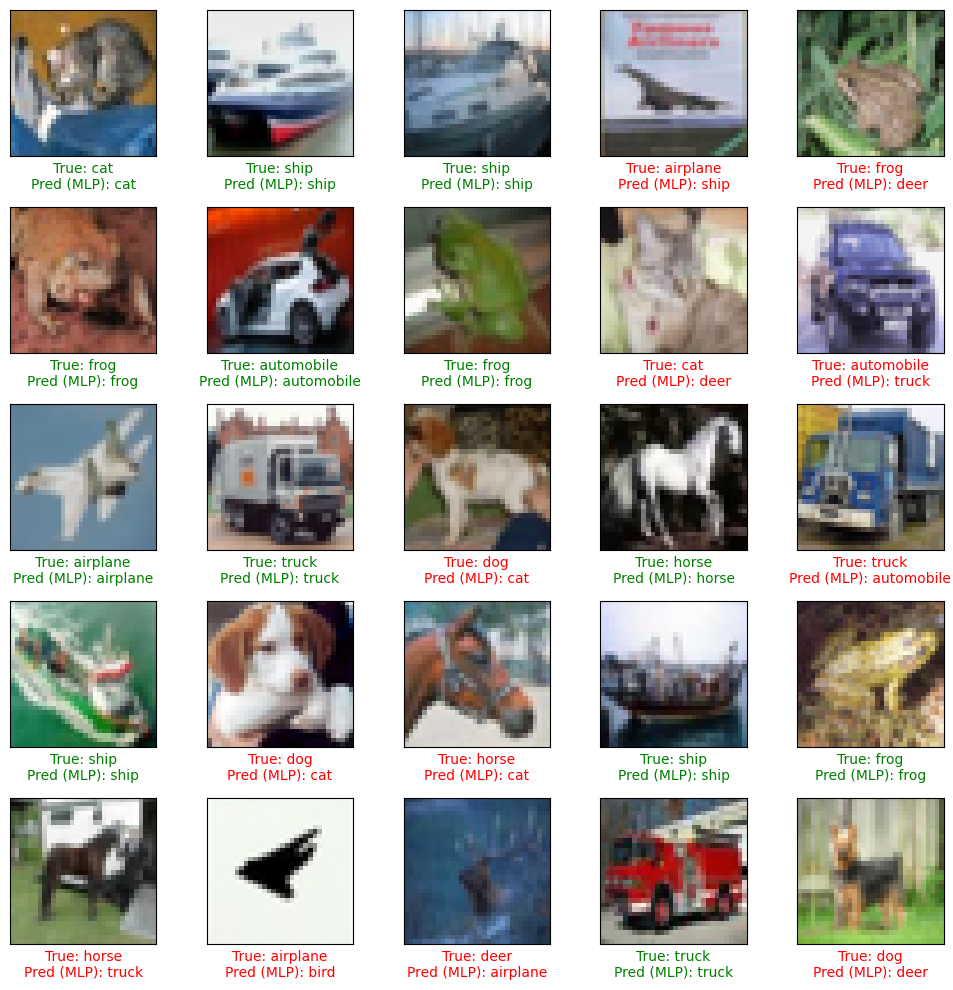

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_mlp = model.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

## **BUILDING A CONVOLUTIONAL NEURAL NETWORK FOR CIFAR-10**

Objective: Develop a Convolutional Neural Network (CNN) to improve the classification performance on the CIFAR-10 dataset, and achieve >70% accuracy.



Dataset Preparation

Load and normalize the CIFAR-10 dataset.
Ensure the images are normalized to a range suitable for CNN processing.

In [ ]:
# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the training set
x_train_min = x_train.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train.max(axis=(0, 1, 2), keepdims=True)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# Normalize the test set using training set statistics
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

# Display the shapes of the normalized datasets
print("x_train_normalized shape:", x_train_normalized.shape)
print("x_test_normalized shape:", x_test_normalized.shape)

x_train_normalized shape: (50000, 32, 32, 3)
x_test_normalized shape: (10000, 32, 32, 3)


# **CNN Architecture**

Design a CNN that includes convolutional layers, activation functions, pooling layers, and fully connected layers.
Detail your choice of kernel sizes, pooling sizes, and the architecture's depth.

In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

The first layer has 32 filters, followed by a ReLU activation function, 'same' padding, and an input shape of (32, 32, 3) which corresponds to 32x32 RGB images.

The subsequent layers continue to add convolutional layers with different numbers of filters and ReLU activations.

MaxPooling layers with a pool size of (2, 2) are added after the convolutional layers to downsample the feature maps.

A Flatten layer is added to transition from the convolutional layers to the dense layers. It flattens the input without affecting the batch size.
We then add dense (fully connected) layers to the model.

The first layer has 128 neurons with ReLU activation, and the output layer has 10 neurons (one for each class in CIFAR-10) with softmax activation, which is typical for multi-class classification problems.

# **Training**

Compile your CNN with a suitable loss function and optimizer.
Utilize techniques such as dropout and batch normalization to prevent overfitting and ensure more stable training.

In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers with batch normalization and dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization layer
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model with suitable loss function and optimizer
optimizer = Adam(learning_rate=0.0001)  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                    

# **Evaluation and Comparison**

Report the accuracy of the model on the CIFAR-10 test set.
Compare the performance of your CNN to the MLP model from Question 2, discussing why the CNN performs differently.

In [ ]:
# Fit the CNN model on the training set
history = model.fit(x_train_normalized, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
352/352 [==============================] - 271s 766ms/step - loss: 2.0873 - accuracy: 0.2646 - val_loss: 2.0434 - val_accuracy: 0.3692
Epoch 2/10
352/352 [==============================] - 270s 767ms/step - loss: 1.6646 - accuracy: 0.4003 - val_loss: 1.5118 - val_accuracy: 0.4950
Epoch 3/10
352/352 [==============================] - 269s 766ms/step - loss: 1.5057 - accuracy: 0.4610 - val_loss: 1.3288 - val_accuracy: 0.5524
Epoch 4/10
352/352 [==============================] - 275s 782ms/step - loss: 1.3820 - accuracy: 0.5074 - val_loss: 1.2313 - val_accuracy: 0.5864
Epoch 5/10
352/352 [==============================] - 269s 765ms/step - loss: 1.2845 - accuracy: 0.5422 - val_loss: 1.1298 - val_accuracy: 0.6144
Epoch 6/10
352/352 [==============================] - 271s 769ms/step - loss: 1.1992 - accuracy: 0.5731 - val_loss: 1.0596 - val_accuracy: 0.6392
Epoch 7/10
352/352 [==============================] - 268s 762ms/step - loss: 1.1379 - accuracy: 0.6012 - val_loss: 1.0033 -

Comparing the performance of the CNN to the MLP model from Question 2, this are potential reasons for differences in performance:

CNN's Ability to Capture Spatial Patterns: CNNs are specifically designed to capture spatial patterns in images. They use convolutional layers that scan the input image with learnable filters to detect local patterns. This ability to capture spatial information can lead to better performance on image classification tasks like CIFAR-10 compared to MLPs, which treat images as flattened vectors and do not consider spatial relationships.

Parameter Efficiency: CNNs typically have fewer parameters compared to fully connected MLPs. CNNs share weights across spatial locations, which allows them to learn efficiently from limited training data. On the other hand, MLPs have fully connected layers, which can lead to a larger number of parameters and increased risk of overfitting, especially on small datasets like CIFAR-10.

Feature Hierarchies: CNNs learn hierarchical representations of features from raw data. Convolutional layers extract low-level features like edges and textures, while deeper layers combine these features to learn more abstract representations. This hierarchical feature learning enables CNNs to effectively represent complex patterns in images, which can result in better performance on image classification tasks.

Regularization Techniques: In the CNN architecture provided, dropout and batch normalization layers are used to prevent overfitting and stabilize training. These regularization techniques help improve the generalization ability of the CNN model by reducing the risk of overfitting to the training data.

# **Visually checking the model predictions (67.69% Accuracy)**

313/313 [==============================] - 16s 49ms/step


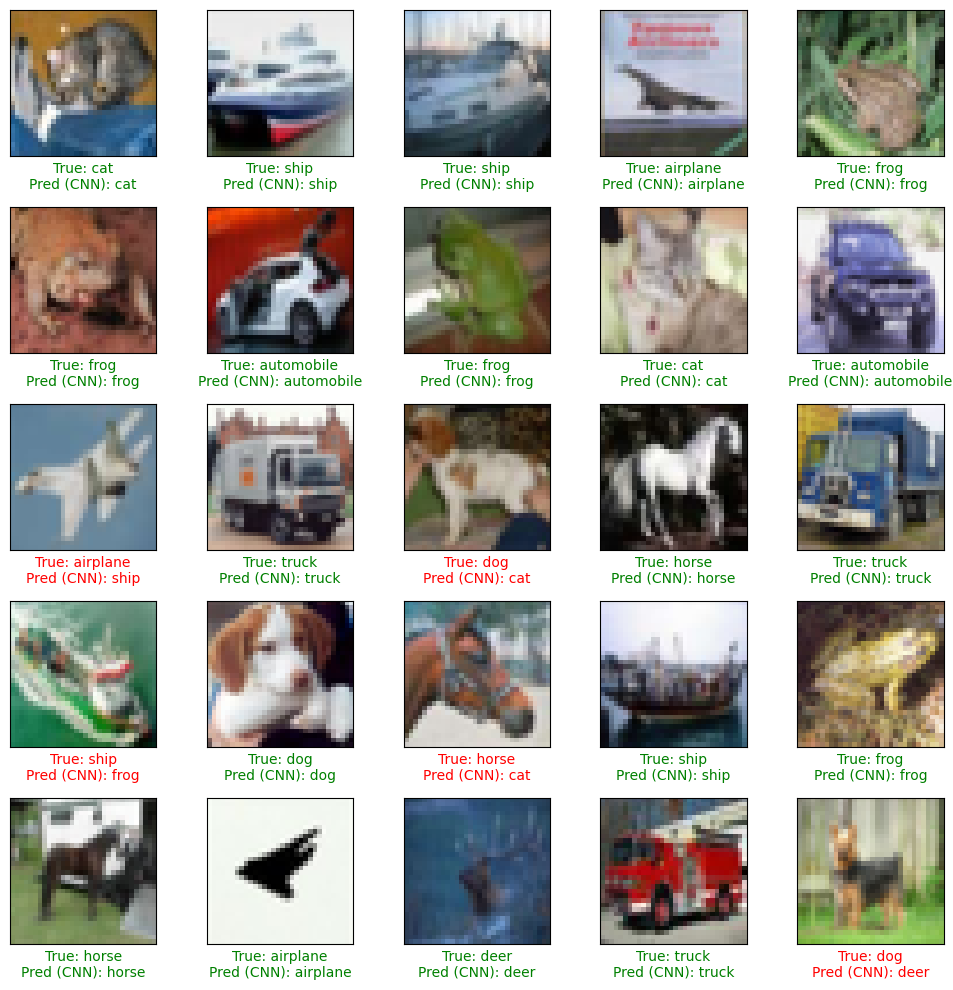

In [ ]:
# Get predictions for the test set
predictions_cnn = model.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_cnn[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

# **LEVRAGING A PRETRAINED MODEL FOR CIFAR-10**

Objective: Use a pretrained model from TensorFlow's Keras applications or PyTorch's torchvision models as a feature extractor or for fine-tuning on the CIFAR-10 dataset, and achieve >90% accuracy on the test dataset of CIFAR-10. .

# **Dataset Preparation:**


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

# Preprocess input images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Preprocess input images using ResNet50 preprocessing
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

In [ ]:
from keras.utils import to_categorical

#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
#Print the dimensions of the datasets to check

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 10))
((5000, 32, 32, 3), (5000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

# **Model Selection, Modification and Training Strategy**




Chosen Model and exclude top layer

The chosen pretrained model is ResNet50, which is loaded using the tf.keras.applications.ResNet50 function.
The model is configured to exclude the top classification layer (include_top=False).


Adjusting inputsize and modify top layer

The input images for CIFAR-10 are 32x32 pixels, while ResNet50 expects input images of size 224x224 pixels.
Therefore, the input images are upsampled to match the input size required by ResNet50.
The classification layers are modified by adding a global average pooling layer and two dense lay
. The final dense layer has 10 units with softmax activation, corresponding to the 10 class in CIFAR-10.
Unfreezing some pre-trained layers

In this case, some of the weights of the pretrained layers are not frozen. As such, they will be fine-tuned during training.
This decision allows the model to adapt slightly to the features specific to the CIFAR-10 dataset.
The down-side is that it could take more parameters and therefore more computational time


Justification of choices

CIFAR-10 is a relatively small dataset with low-resolution images.
Fine-tuning the some of the network allows the model to learn more specific features relevant to the CIFAR-10 dataset.
Since ResNet50 is pretrained on a large dataset (ImageNet) and has already learned valuable hierarchical features, fine-tuning some layers in the entire network can help improve model performance on CIFAR-10.
To set it as a variable to decide how many layers to unfreeze

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, UpSampling2D
from tensorflow.keras.models import Model

# Feature Extraction is performed by ResNet50 pretrained on imagenet weights.
# Input size is 224 x 224.
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Upsample the input image to match the size expected by ResNet50
resized_inputs = UpSampling2D(size=(7, 7))(inputs)

In [ ]:
# Load the ResNet50 model with pretrained weights
resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs  # Use resized input as input tensor
)

# Freeze all layers initially
for layer in resnet_model.layers:
    layer.trainable = False

# Unfreeze the last X layers of the ResNet50 model
NUM_LAYERS_TO_UNFREEZE = 30
for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
    layer.trainable = True

# Global average pooling and classification layers
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
classification_output = Dense(10, activation="softmax", name="classification")(x)

# Connect the feature extraction and "classifier" layers to build the model
ResNet_model = Model(inputs=inputs, outputs=classification_output, name="ResNet")

# Compile the model
optimizer = tf.keras.optimizers.Adam()  # Use Adam optimizer


#Specify the loss as categorical_crossentropy since the labels are 1 hot encoded.
#If labels are integer, use sparse categorical crossentropy as loss function.
ResNet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ResNet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 up_sampling2d (UpSampling2  (None, 224, 224, 3)          0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['up_sampling2d[0][0]']       
                                                                                                  
 conv1_conv (Conv2D)        

In [ ]:
# Count the number of layers
num_layers = len(ResNet_model.layers)
print("Number of layers in the model:", num_layers)

Number of layers in the model: 187


# **Evaluation**

Test the model on the CIFAR-10 test set and report the accuracy.
Compare the results with the MLP and CNN models from the previous questions, discussing the advantages and limitations of using pretrained models on a dataset like CIFAR-10.

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 1 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 5 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


batch_size=64
epochs=10

history = ResNet_model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                                     epochs=epochs,
                                     steps_per_epoch=x_train.shape[0]//batch_size,
                                     validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                                     #validation_steps=250,
                                     callbacks=[reduce_lr, early_stopping],
                                     shuffle = True
                                    )
# Evaluate the model
test_loss, test_accuracy = ResNet_model.evaluate(test_generator.flow(x_test,y_test,batch_size=batch_size))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
  1/703 [..............................] - ETA: 3:03:51 - loss: 1.5456 - accuracy: 0.5625

KeyboardInterrupt: 

After multiple iterations, combinations as well as computational time, we finally arrive at a test accuracy of 0.914 that is > 90%. The set-up of the model to achieve this is as such:

Train test split for validation data
OHE the categories of classes
Use image generator for Data augmentation
Use ResNet50 and exclude top layer and add our own Nueral Network to Batch Normalise and droupout before classifying into 10 nodes
Used upsampling (7,7) to match with CIFAR-10 (32 x 32) images with ResNet 224 x 224 input size
Initially freeze all layers but subsuequently unfreeze 20 layers to allow some weights in ResNet50 to be updated and improve performance
Use Adam optimizer rather than SGD as if has adaptive learning rates
Include reduce learning rate and early stopping functions in fitting to ensure each epoch helps to improve the result
include shuffle = True to ensure model does not learn also the sequence of data and cause overfitting
linkcode
Advantages of using pretrained models like ResNet on CIFAR-10:

Transfer Learning: Pretrained models come with knowledge learned from large-scale datasets like ImageNet, which can be transferred to CIFAR-10, improving performance with limited labeled data.
Feature Extraction: Pretrained models can extract meaningful features from images, capturing hierarchical representations that might not be effectively learned from scratch.
Higher accuracy: Using a pretrained model that is based on a much larger dataset can help to achieve much higher accuracy than other models built from scratch since the training data was much larger than what we have.
Limitations of using pretrained models:

Domain Adaptation: Pretrained models might not perfectly adapt to the characteristics of CIFAR-10, leading to suboptimal performance.
Task Specificity: Pretrained models are designed for specific tasks, and their features might not always be relevant to CIFAR-10 classification tasks.
Overfitting Risk: Fine-tuning the entire pretrained model on a small dataset like CIFAR-10 can lead to overfitting if not properly regularized.

# **Visually checking the model predictions (91.4% Accuracy)**